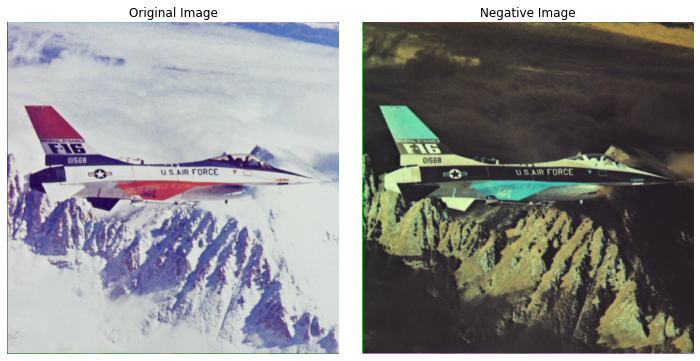

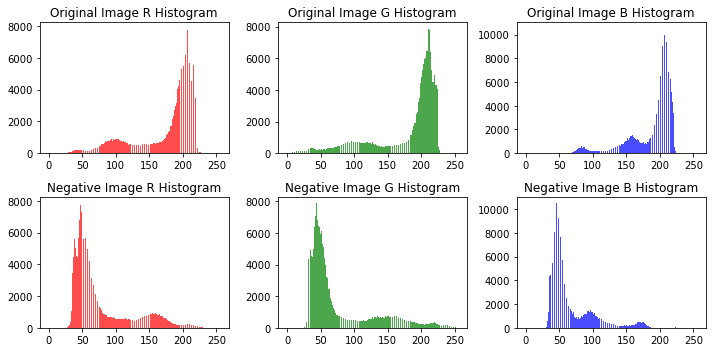

In [1]:
#(3) Generating Negative from Color Image
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the image data from the file.
with open('./Project1_Files/Images/F-16.raw', 'rb') as f:
    img_data = np.frombuffer(f.read(), dtype=np.uint8)

# 2. Reshape the data to a 512x512 image with 3 channels (R, G, B).
img = img_data.reshape(512, 512, 3)

# 3. Compute the negative image.
negative_img = 255 - img

# 4. Display the original and negative images side by side.
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_img)
plt.title('Negative Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# Function to compute histogram
def compute_histogram(image_channel):
    histogram = np.zeros(256, dtype=np.int32)
    for pixel_value in image_channel.ravel():
        histogram[pixel_value] += 1
    return histogram

# 5. Plot the color histograms.
colors = ('r', 'g', 'b')
plt.figure(figsize=(10, 5))

for i, color in enumerate(colors):
    original_hist = compute_histogram(img[:,:,i])
    negative_hist = compute_histogram(negative_img[:,:,i])
    
    plt.subplot(2, 3, i+1)
    plt.bar(range(256), original_hist, color=color, alpha=0.7)
    plt.title(f'Original Image {color.upper()} Histogram')
    
    plt.subplot(2, 3, i+4)
    plt.bar(range(256), negative_hist, color=color, alpha=0.7)
    plt.title(f'Negative Image {color.upper()} Histogram')

plt.tight_layout()
plt.show()


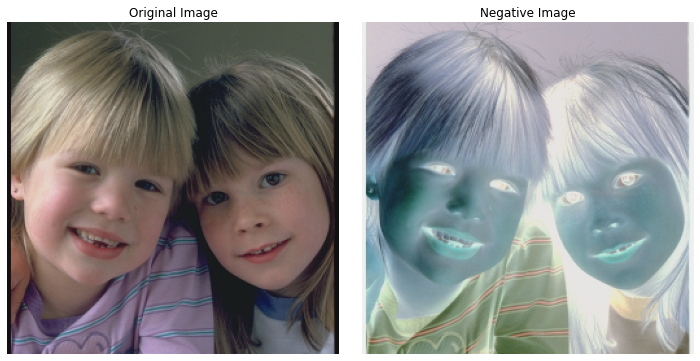

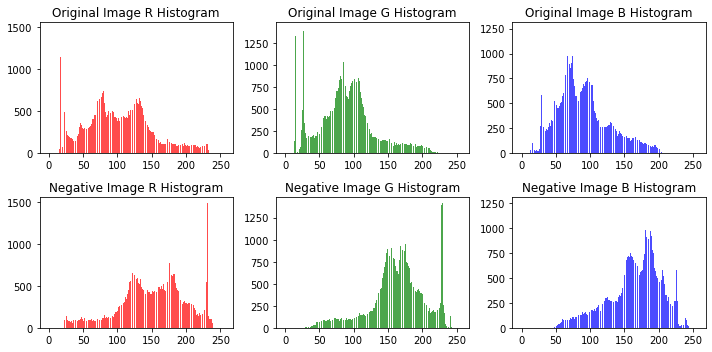

In [7]:
#(3) Generating Negative from Color Image
#(3) Generating Negative from Color Image
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the image data from the file.
with open('./Project1_Files/Images/girls.raw', 'rb') as f:
    img_data = np.frombuffer(f.read(), dtype=np.uint8)

# 2. Reshape the data to a 512x512 image with 3 channels (R, G, B).
img = img_data.reshape(256, 256, 3)

# 3. Compute the negative image.
negative_img = 255 - img

# 4. Display the original and negative images side by side.
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_img)
plt.title('Negative Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# Function to compute histogram
def compute_histogram(image_channel):
    histogram = np.zeros(256, dtype=np.int32)
    for pixel_value in image_channel.ravel():
        histogram[pixel_value] += 1
    return histogram

# 5. Plot the color histograms.
colors = ('r', 'g', 'b')
plt.figure(figsize=(10, 5))

for i, color in enumerate(colors):
    original_hist = compute_histogram(img[:,:,i])
    negative_hist = compute_histogram(negative_img[:,:,i])
    
    plt.subplot(2, 3, i+1)
    plt.bar(range(256), original_hist, color=color, alpha=0.7)
    plt.title(f'Original Image {color.upper()} Histogram')
    
    plt.subplot(2, 3, i+4)
    plt.bar(range(256), negative_hist, color=color, alpha=0.7)
    plt.title(f'Negative Image {color.upper()} Histogram')

plt.tight_layout()
plt.show()


In [1]:
import numpy as np

def raw_to_rgb(filepath, width, height):
    # Dummy implementation, replace with your actual function.
    # Assuming the raw image is in a format that can be read directly into an array.
    return np.fromfile(filepath, dtype=np.uint8).reshape((height, width, 3))

def rgb_to_grayscale(rgb_img):
    # Compute the grayscale image using the luminosity method.
    return np.dot(rgb_img[...,:3], [0.2989, 0.5870, 0.1140])

def place_logo(logo, background, threshold, y_offset, x_offset):
    mask = np.sum(logo, axis=2) < threshold
    mask = np.stack([mask]*3, axis=-1)  # Create a 3-channel mask

    # Use numpy slicing and boolean indexing to place the logo.
    background_slice = background[y_offset:y_offset+logo.shape[0], x_offset:x_offset+logo.shape[1]]
    background_slice[mask] = logo[mask]

    return background  # The original background is modified in place

def restore_area(original, modified, y0, y1, x0, x1, offset_y, offset_x):
    # Use slicing to restore an area from the original to the modified image.
    modified[offset_y+y0:offset_y+y1, offset_x+x0:offset_x+x1] = original[y0:y1, x0:x1]

    return modified  # The original modified image is updated in place

# Example usage
img = raw_to_rgb('./Project1_Files/Images/building2_color.raw', width, height)
logo_colour = raw_to_rgb('./Project1_Files/Images/dku_logo_color.raw', 128, 128)

# Place the logo onto the image background with a threshold
img_combined = place_logo(logo_colour, img, thres, y_0_0, x_0_0)

# Restore a section of the logo from the original logo image
img_restored = restore_area(logo_colour, img_combined, y_0, y_1, x_0, x_1, y_0_0, x_0_0)

# Display the result
import matplotlib.pyplot as plt
plt.imshow(img_restored)
plt.axis('off')
plt.show()


NameError: name 'width' is not defined

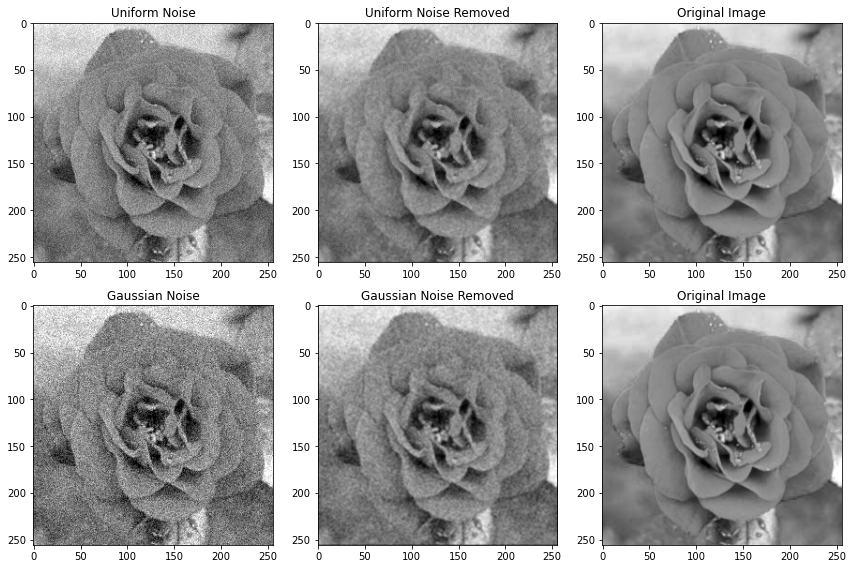

In [5]:
#Problem 3: Noise removal - (1) Gray-level image

import numpy as np
import matplotlib.pyplot as plt

def read_raw_image(file_path, shape):
    with open(file_path, 'rb') as file:
        img = np.fromfile(file, dtype=np.uint8)
    return img.reshape(shape)

def median_filter(img, kernel_size=3):
    padded_img = np.pad(img, kernel_size//2, mode='constant')
    output_img = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            output_img[i, j] = np.median(padded_img[i:i+kernel_size, j:j+kernel_size])
    return output_img

def gaussian_filter(img, kernel_size=3, sigma=1):
    kernel = np.fromfunction(lambda x, y: (1/ (2 * np.pi * sigma**2)) * 
                             np.exp(- ((x - (kernel_size-1)/2)**2 + (y - (kernel_size-1)/2)**2) / (2 * sigma**2)), 
                             (kernel_size, kernel_size))
    kernel /= np.sum(kernel)
    padded_img = np.pad(img, kernel_size//2, mode='constant')
    output_img = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            output_img[i, j] = np.sum(padded_img[i:i+kernel_size, j:j+kernel_size] * kernel)
    return output_img

# Load the raw images
rose_uni = read_raw_image('./Project1_Files/Images/rose_uni.raw', (256, 256))
rose_gau = read_raw_image('./Project1_Files/Images/rose_gau.raw', (256, 256))
rose_original = read_raw_image('./Project1_Files/Images/rose.raw', (256, 256))

# Apply median filter for uniform noise
rose_uni_filtered = median_filter(rose_uni)

# Apply gaussian filter for gaussian noise
rose_gau_filtered = gaussian_filter(rose_gau)

# Display the images
plt.figure(figsize=(12, 8))
plt.subplot(231), plt.imshow(rose_uni, cmap='gray'), plt.title('Uniform Noise')
plt.subplot(232), plt.imshow(rose_uni_filtered, cmap='gray'), plt.title('Uniform Noise Removed')
plt.subplot(233), plt.imshow(rose_original, cmap='gray'), plt.title('Original Image')
plt.subplot(234), plt.imshow(rose_gau, cmap='gray'), plt.title('Gaussian Noise')
plt.subplot(235), plt.imshow(rose_gau_filtered, cmap='gray'), plt.title('Gaussian Noise Removed')
plt.subplot(236), plt.imshow(rose_original, cmap='gray'), plt.title('Original Image')
plt.tight_layout()
plt.show()


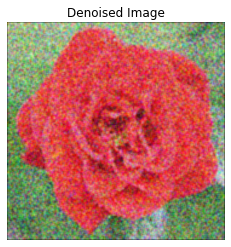

In [6]:
#Problem 3: Noise removal - (2) Color image
import numpy as np
import matplotlib.pyplot as plt

def read_raw_image(file_path, shape):
    # Reading the raw image file
    with open(file_path, 'rb') as file:
        img = np.fromfile(file, dtype=np.uint8)
    return img.reshape(shape)

def write_raw_image(img, file_path):
    # Writing the image to a raw file
    with open(file_path, 'wb') as file:
        img.tofile(file)

def convolve(image, kernel):
    # Getting the dimensions
    img_height, img_width, _ = image.shape
    kernel_height, kernel_width = kernel.shape
    
    # Padding the image
    pad_height, pad_width = kernel_height // 2, kernel_width // 2
    padded_img = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width), (0, 0)), 'constant')
    
    # Convolution
    output_img = np.zeros((img_height, img_width, 3), dtype=np.uint8)
    for i in range(img_height):
        for j in range(img_width):
            for k in range(3):  # For each color channel
                region = padded_img[i:i+kernel_height, j:j+kernel_width, k]
                output_img[i, j, k] = np.sum(region * kernel)
    return output_img

# Define the average kernel for blurring
average_kernel = np.ones((3, 3)) / 9

# Reading the noisy image
noisy_image_path = './Project1_Files/Images/rose_color_noise.raw'
noisy_image_shape = (256, 256, 3)  # Assuming the image is a 256x256 RGB image
noisy_image = read_raw_image(noisy_image_path, noisy_image_shape)

# Applying the convolution with the average kernel
denoised_image = convolve(noisy_image, average_kernel)

def plot_image(img, title):
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Plotting the denoised image
plot_image(denoised_image, 'Denoised Image')
